# Yandex Недвижимость

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


# Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
pd.DataFrame(data.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_apartment,88.290000
parks_nearest,65.910000
ponds_nearest,61.560000
balcony,48.610000
ceiling_height,38.800000
airports_nearest,23.380000
cityCenters_nearest,23.290000
parks_around3000,23.280000
ponds_around3000,23.280000
days_exposition,13.420000


Есть пропуски в ceiling_height(высота потолков) - эти данные понадобяться для анализа сегмента квартир в центре. Среднее или медиану лучше не применять, так как в центре высокие потолки, что нельзя сказать о квартирах удаленных от центра. И медиана или среднее могут повлиять на качество анализа. 

floors_total(всего этажей в доме). Здесь пропуски также не заполнить медианным или средним значением, так как в центре этажность составляет около 3-5 этажей, а на окраине высокоэтажки от 12 этажей и выше. 

living_area(жилая площадь) - здесь пропуски могут быть обусловлены тем, что если это апартаменты, то невозможно указать жилую площадь, так как это нежилые помещения, но имеют необходимые условия для проживания. Если не апартаменты, то пропуски также могут быть связаны с тем, что квартира может быть по типу евро, когда кухня объеденена с гостиной. Гостиная относится к жилой, а вот кухня нет.

is_apartment(апартаменты) - логически, если это апартаменты то True, если нет, то может быть пропуск (не отметили как апартаменты), либо False. Считаю правильным заполнить пропуски значением False. 

kitchen_area(площадь кухни) - также может быть пропуск если речь идет о апартаментах, студии или евро-планировки(где гостиная совмещена с кухней). Не стоит заполнять эти пропуски. 

balcony(число балконов) - пропуск может быть обусловлен тем, что отсутствует вовсе. Поэтому можно заменить все пропуски на 0. 

locality_name(название населенного пункта) - таких пропусков всего 49 шт. лучше избавиться от пропущенных значений. 

airports_nearest(расстояние до ближайшего аэрапорта в метрах), parks_around3000(число парков в радиусе 3 км), parks_nearest(расстояние до ближайшего парка), ponds_around3000(число водоемов в радиусе 3 км.), ponds_nearest(расстояние до ближайшего водоема) - эти данные не нужны для анализа.

cityCenters_nearest(расстояние до центра города) - возможно недвижимость находится очень далеко от центра и нет смысла указывать в метрах расстояние. Здесь логически ничем не заменить пропуски. 

days_exposition(сколько дней было размещено объявление) - возможно объявление было размещено всего пару часов и удалено в связи с доработкой. Думаю стоит заменить пропуски на 0 и привести к целому числу. 

In [6]:
data.dropna(subset=['locality_name'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [7]:
data['locality_name'] = data['locality_name'].astype('str')

## Заполнение пропусков

In [8]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [10]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

## Поиск явных и неявнях дубликатов

In [11]:
print(data.duplicated().sum()) 

0


In [12]:
print(sorted(data['locality_name'].unique()))

['nan', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревн

In [13]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
words_to_delete = ['городской поселок', 'деревня', 'городской','поселок', 'городского типа','садовое товарищество','село','станции','при железнодорожной','садовое товарищество','коттеджный','Пансионат','садоводческое некоммерческое товарищество','садовое товарищество']
for word in words_to_delete:
    data['locality_name'] = data['locality_name'].str.replace(word,'')
data['locality_name'] = data['locality_name'].str.replace('О', 'о')

## Добавляем столбцы для расчетов

In [14]:
data['price_square_meter'] = data['last_price'] / data['total_area']

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

In [16]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['year'] = data['first_day_exposition'].dt.year 
data['month'] = data['first_day_exposition'].dt.month

In [17]:
def wich_floor(row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
data['wich_floor'] = data.apply(wich_floor,axis=1)

In [18]:
data['useful_area_ratio'] = data['living_area'] / data['total_area']

In [19]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,year,month,wich_floor,useful_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370.370370,3,2019,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,82920.792079,1,2018,12,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,92785.714286,3,2015,8,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,408176.100629,4,2015,7,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000.000000,1,2018,6,другой,0.320000,0.410000


## Исследовательский анализ

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

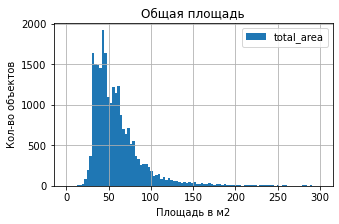

In [21]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,300))
plt.title('Общая площадь')
plt.xlabel('Площадь в м2')
plt.ylabel('Кол-во объектов')
data['total_area'].describe()

Общая площадь колеблится в пределах 12 и 900 м2. Среднее значение составляет 60, а медиана 52. Соответствует нормальному распределению. 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

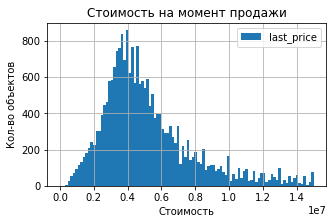

In [22]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.title('Стоимость на момент продажи')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во объектов')
data['last_price'].describe()

Цены на недвижимость имеют среднее значение в 6,5 млн руб., а медиана составляет 4,6 млн руб, что тоже является нормальным распределением. 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

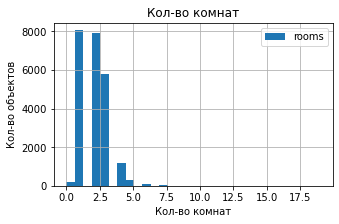

In [23]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
plt.title('Кол-во комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объектов')
data['rooms'].describe()

Большая доля у однокомнатных и двухкомнатных квартир.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

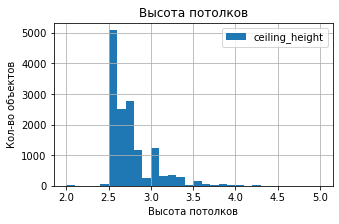

In [24]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во объектов')
data['ceiling_height'].describe()

Высота потолков в среднем составляет 2,77 м. 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

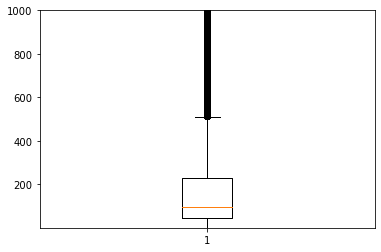

In [25]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)
data[data['days_exposition']!=0]['days_exposition'].describe()

Средняя продолжительность продажи квартиры составляет 180 дней, медианное значение 95 дней.

<AxesSubplot:ylabel='Frequency'>

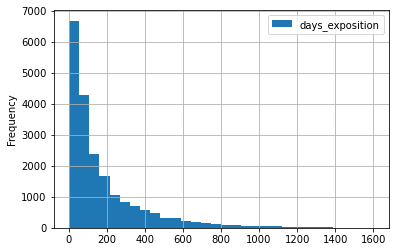

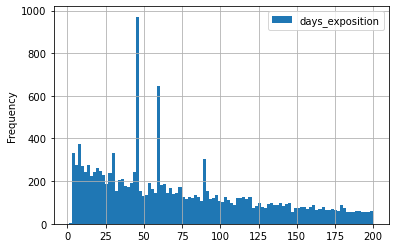

In [26]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [27]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

Мы обнаружили выбивающиеся значения методом value_counts. Выявила следующие аномалии: 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. Возможно стоит автоматическое снятие объявления с продажи.
Продажа обычно занимает от 7 до 200 дней. Считаю что можно считать слишком быстрыми продажи до 7 дней, а слишком долгими больше 800 дней. 

In [28]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
#столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)


In [29]:
data[['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']].describe().loc[['min', 'max']]

,last_price,total_area,kitchen_area,living_area,days_exposition,ceiling_height,rooms
min,12190.0,12.0,1.30,2.0,0.0,2.20,0.0
max,11894400.0,114.6,19.45,77.8,464.0,3.21,5.0


0.11734902421601591

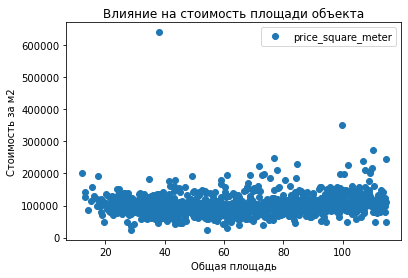

In [30]:
data.pivot_table(index = 'total_area', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median', style = 'o')
plt.title('Влияние на стоимость площади объекта')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость за м2')
data['total_area'].corr(data['price_square_meter'])

Стоимость квадратного метра не сильно зависит от размера общей площади. 

0.022575230090428174

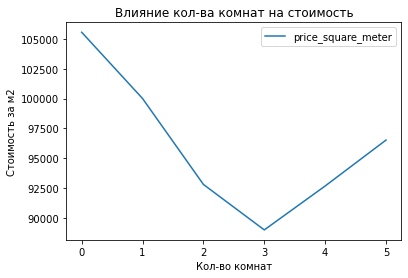

In [31]:
data.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')
plt.title('Влияние кол-ва комнат на стоимость')
plt.xlabel('Кол-во комнат')
plt.ylabel('Стоимость за м2')
data['rooms'].corr(data['price_square_meter'])

3-х комнатные квартиры стоят дешевле. В трехкомнатных квартирах больше коридоров или есть проходные комнаты, возможно это влияет на цену. Также это может быть связано с апартаментами и евро-планировкой, такие квартиры в связи с тенденцией стоят дороже. Так же большое кол-во комнат в бывших коммунальных квартирах, а это старый фонд и неудобная планировка, что тоже влияет на цену. 

Text(0, 0.5, 'Стоимость за м2')

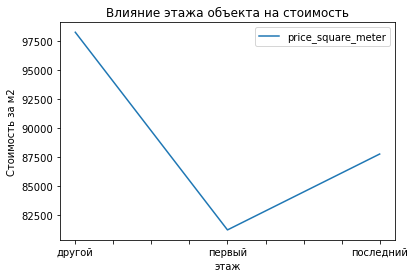

In [32]:
data.pivot_table(
    index = 'wich_floor', values = 'price_square_meter', aggfunc = ['median']
).plot(y = 'median')
plt.title('Влияние этажа объекта на стоимость')
plt.xlabel('этаж')
plt.ylabel('Стоимость за м2')

Квартиры на первом этаже дешевле  

-0.31795076959343477

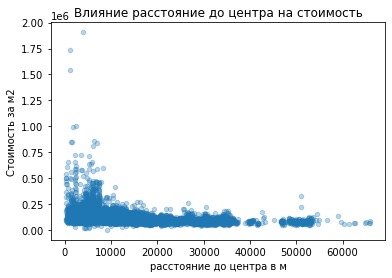

In [33]:
data.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest', alpha = 0.3)
plt.title('Влияние расстояние до центра на стоимость')
plt.xlabel('расстояние до центра в м')
plt.ylabel('Стоимость за м2')
data['cityCenters_nearest'].corr(data['price_square_meter'])

На графике видна явная зависимость: чем ближе к центру, тем дороже стоимость. 

Text(0, 0.5, 'Стоимость за м2')

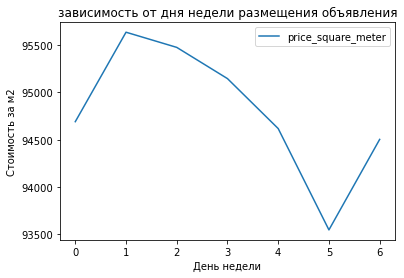

In [34]:
data.pivot_table(index = 'weekday', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')
plt.title('зависимость от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Стоимость за м2')

В начале недели стоимость за квадратный метр выше, а ближе к выходным стоимость падает. 

Text(0, 0.5, 'Стоимость за м2')

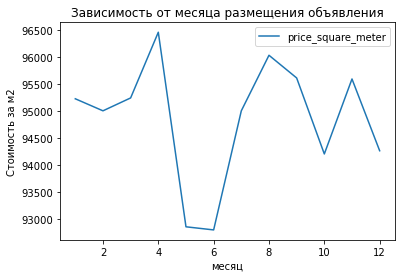

In [35]:
data.pivot_table(index = 'month', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')
plt.title('Зависимость от месяца размещения объявления')
plt.xlabel('месяц')
plt.ylabel('Стоимость за м2')

Объявления размещенные в мае и июне самые дешевые, скорее всего связано с периодом отпусков. 

Text(0, 0.5, 'Стоимость за м2')

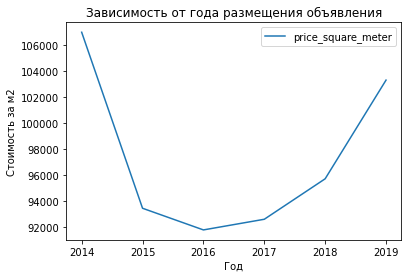

In [36]:
data.pivot_table(index = 'year', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')
plt.title('Зависимость от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Стоимость за м2')

Видно проседание стоимости с 2014 по 2016 года. Псле 2016 года цены пошли вверх. 

In [37]:
city_ten = data['locality_name'].value_counts().head(10)
city_sq_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='price_square_meter', index='locality_name')
city_sq_price = city_sq_price.astype(int)
city_sq_price.sort_values('price_square_meter', ascending=False)

,price_square_meter
locality_name,
Санкт-Петербург,114849
Пушкин,103125
Кудрово,92473
Парголово,90175
Мурино,85681
Шушары,78677
Колпино,75424
Гатчина,68746
Всеволожск,68654


Самая высокая стоимость недвижимости в Санкт-Петербурге, а самая дешевая в Выборге. 

Text(0, 0.5, 'Стоимость за м2')

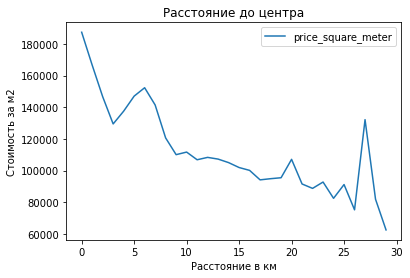

In [38]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean').plot()
plt.title('Расстояние до центра')
plt.xlabel('Расстояние в км')
plt.ylabel('Стоимость за м2')

Исходя из графика, можно сказать что к центру относится радиус в 6-7 км. 

-0.019598136917309245

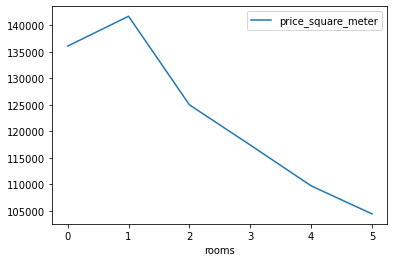

In [39]:
#выделяю квартиры в центре (радиус 7 км)
center_spb_data = data.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')
#Зависимость стоимости квадратного метра от количества комнат
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')
center_spb_data['rooms'].corr(center_spb_data['price_square_meter'])

В цетре Спб стоимость за м2 зависит от кол-ва комнат. Чем больше комнат, тем дешевле. Видимо связано с бывшими коммунальными квартирами. 

<AxesSubplot:xlabel='wich_floor'>

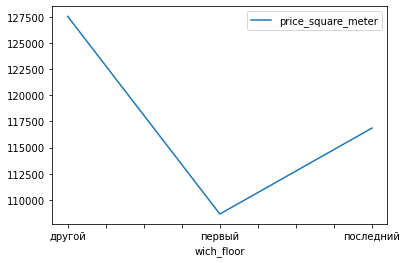

In [40]:
#Зависимость стоимости квадратного метра от этажа
center_spb_data.pivot_table(
    index = 'wich_floor', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')

На первом этаже стоимость ниже, с кол-вом этажей растет стоимость. 

-0.03093863923859851

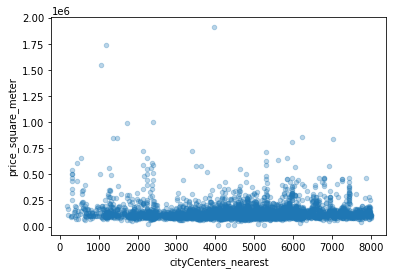

In [41]:
#Зависимость стоимости квадратного метра от удаленности от центра
center_spb_data.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest', alpha = 0.3)
center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_square_meter'])

Нет четкой зависимости. 

<AxesSubplot:xlabel='weekday'>

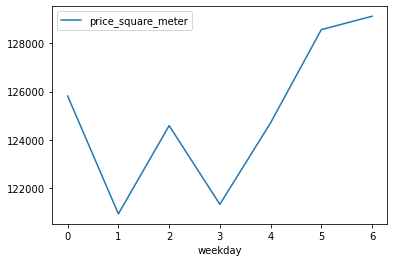

In [42]:
#Зависимость стоимости квадратного метра от дня недели размещения объявления
center_spb_data.pivot_table(
    index = 'weekday', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')

В данном случае серидина и конец недели самые дорогие. 

<AxesSubplot:xlabel='month'>

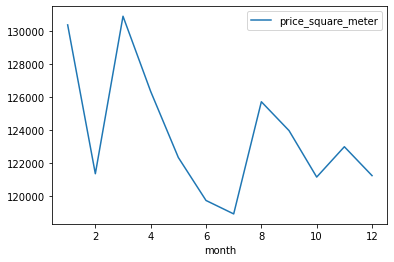

In [43]:
#Зависимость стоимости квадратного метра от месяца размещения объявления
center_spb_data.pivot_table(
    index = 'month', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')

Самая высокая стоимость в марте и августе, а в июле самая дешевая. 

<AxesSubplot:xlabel='year'>

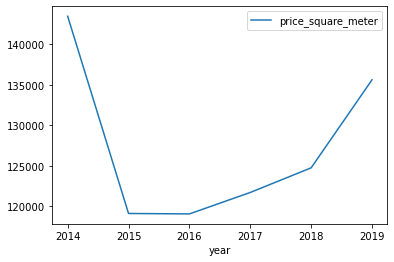

In [44]:
#Зависимость стоимости квадратного метра от года размещения объявления
center_spb_data.pivot_table(
    index = 'year', values = 'price_square_meter', aggfunc = ['median']).plot(y = 'median')

Здесь такая же ситуация. Большое проседание по соимости с 2014 по 2016 года. После 2016 года стоимость растет. 

## Общий вывод
Данные были боработаны: удалены проруски, которые могли помешать расчету. Исправлены типы данных. 
Также были изучены площадь, число комнат, цена и высота потолков. Были выявлены аномалии в данных категориях.

Среднее время продажи жилой недвижимости составляет от 7 до 200 дней. Аномальными считаю сроки до 7 дней и больше 800 дней. На стоимость м2 влиет кол-во комнат(2-х комнатные квартиры дороже, а чем больше комнат, тем цена ниже), также этаж влияет на стоимость(квартиры на первых этажах дешевле, а чем выше этаж, тем выше стоимость). И немаловажный факт: чем ближе к центру, тем выше цена( квартиры в радиусе 7 км относятця к центру). 

Что касается даты размещения. Наблюдается проседание в стоимости квартир с 2014 по 2016 года. В эти года и срок продажи увеличивается. Месяцы размещения также влияют на сооимость: чем ближе к лету, тем меньше стоимость. 

